<a href="https://colab.research.google.com/github/imabari/rakuten_tools/blob/main/rakuten_tac_area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.esrij.com/cgi-bin/wp/wp-content/uploads/2012/10/japan_ver84.zip

--2022-06-12 13:54:41--  https://www.esrij.com/cgi-bin/wp/wp-content/uploads/2012/10/japan_ver84.zip
Resolving www.esrij.com (www.esrij.com)... 180.235.251.136
Connecting to www.esrij.com (www.esrij.com)|180.235.251.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6180600 (5.9M) [application/zip]
Saving to: ‘japan_ver84.zip’

japan_ver84.zip     100%[===================>]   5.89M  3.61MB/s    in 1.6s    

2022-06-12 13:54:44 (3.61 MB/s) - ‘japan_ver84.zip’ saved [6180600/6180600]



In [2]:
!pip install -U geopandas
!pip install -U rtree
!pip install -U pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.8 MB/s 
     |████████████████████████████████| 16.7 MB 289 kB/s 
     |████████████████████████████████| 6.3 MB 35.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 10.5 MB/s 


In [3]:
!pip install -U pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import geopandas as gpd
import pandas as pd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [5]:
# 解像度
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 200

In [6]:
japan = gpd.read_file("japan_ver84.zip!japan_ver84")

In [7]:
# 都道府県番号
japan["PREF"] = japan["JCODE"].str[:2]

In [8]:
# 郡と市区町村名を結合
japan["CITY"] = japan[["GUN", "SEIREI", "SIKUCHOSON"]].fillna("").apply(lambda s: "".join(s), axis=1)

In [9]:
japan

,JCODE,KEN,SICHO,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,geometry,PREF,CITY
0,01101,北海道,石狩振興局,None,札幌市,中央区,"Sapporo-shi, Chuo-ku",239944,146024,0.542590,0.005128,"POLYGON ((141.34233 43.06682, 141.35520 43.068...",01,札幌市中央区
1,01102,北海道,石狩振興局,None,札幌市,北区,"Sapporo-shi, Kita-ku",286054,153908,0.567773,0.007031,"POLYGON ((141.40839 43.18395, 141.40427 43.182...",01,札幌市北区
2,01103,北海道,石狩振興局,None,札幌市,東区,"Sapporo-shi, Higashi-ku",262298,144421,0.397203,0.006289,"POLYGON ((141.44698 43.15513, 141.44860 43.153...",01,札幌市東区
3,01104,北海道,石狩振興局,None,札幌市,白石区,"Sapporo-shi, Shiroishi-ku",214050,124710,0.308211,0.003815,"POLYGON ((141.46569 43.10000, 141.46812 43.097...",01,札幌市白石区
4,01105,北海道,石狩振興局,None,札幌市,豊平区,"Sapporo-shi, Toyohira-ku",224435,129875,0.428316,0.005101,"POLYGON ((141.38479 43.04660, 141.38558 43.047...",01,札幌市豊平区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,47362,沖縄県,None,島尻郡,None,八重瀬町,Yaese-cho,31882,12618,0.288020,0.002441,"MULTIPOLYGON (((127.76117 26.12400, 127.76255 ...",47,島尻郡八重瀬町
1903,47375,沖縄県,None,宮古郡,None,多良間村,Tarama-son,1103,520,0.247357,0.001956,"MULTIPOLYGON (((124.73021 24.64206, 124.73135 ...",47,宮古郡多良間村
1904,47381,沖縄県,None,八重山郡,None,竹富町,Taketomi-cho,4300,2483,2.158236,0.029741,"MULTIPOLYGON (((123.76601 24.06841, 123.76380 ...",47,八重山郡竹富町
1905,47382,沖縄県,None,八重山郡,None,与那国町,Yonaguni-cho,1697,953,0.314766,0.002570,"MULTIPOLYGON (((123.00349 24.47277, 123.00128 ...",47,八重山郡与那国町


In [10]:
df0 = pd.read_json("https://cellmap.rukihena.com/mls44011.json")
df0

,lat,lon,area,cell,unit,range,samples,created,updated
0,35.673958,139.447787,1,51200257,1,23,2,1651282432,1651282432
1,34.684203,135.764690,1,67932160,7,74,3,1651307728,1651307728
2,34.722659,135.726660,1,68311395,17,76,4,1646717700,1646717700
3,34.708910,135.711737,1,68445141,15,37,2,1646717700,1646717700
4,34.620415,135.686617,1,68665311,38,71,3,1649312459,1649312459
...,...,...,...,...,...,...,...,...,...
108160,26.211672,127.674478,65440,219391760,495,97,2,1637397058,1637397058
108161,26.252926,127.710943,65440,219394837,500,27,2,1649833550,1649833550
108162,26.207604,127.698940,65440,219397890,493,187,2,1650355595,1653655222
108163,26.271765,127.728284,65440,219398668,503,59,3,1649833550,1649833550


In [11]:
# 日時に変換
df0["created"] = pd.to_datetime(df0["created"], unit="s")
df0["updated"] = pd.to_datetime(df0["updated"], unit="s")

In [12]:
# 経過日数
df0["days"] = (df0.updated - df0.created).dt.days

In [13]:
# 条件抽出
df1 = df0.query("(0x400000 < cell < 0xD800000) & (unit < 390) & (samples > 10) & (days > 7)").copy()
df1

,lat,lon,area,cell,unit,range,samples,created,updated,days
6,35.595048,139.671186,111,71304961,152,195,12,2022-01-10 02:55:56,2022-02-11 06:09:46,32
7,35.593327,139.668826,111,71304962,193,2156,15,2021-02-22 04:39:16,2022-05-14 07:40:56,446
8,35.594231,139.669523,111,71304963,150,17414,138,2020-12-02 10:37:08,2022-06-05 07:39:36,549
9,35.592671,139.675619,111,71304964,141,407,55,2021-01-14 19:52:18,2022-03-19 16:09:02,428
10,35.594507,139.674061,111,71304966,95,285,36,2021-01-14 19:52:18,2022-03-19 16:09:02,428
...,...,...,...,...,...,...,...,...,...,...
106461,35.647113,139.836642,55556,71508231,262,257,17,2021-05-09 17:41:36,2022-02-13 08:23:21,279
106463,35.647066,139.834350,55556,71508233,17,249,11,2021-05-09 17:41:36,2022-02-13 08:23:21,279
106466,35.647678,139.835363,55556,71547658,292,1914,31,2021-05-09 17:41:36,2022-02-13 08:23:21,279
106717,35.681200,139.558027,63968,72668942,365,259,22,2021-08-24 17:11:56,2022-05-18 00:31:00,266


In [14]:
# 緯度経度をgeometryに変換
pt_df = gpd.GeoDataFrame(df1, geometry = gpd.points_from_xy(df1.lon, df1.lat), crs="EPSG:6668")
pt_df

,lat,lon,area,cell,unit,range,samples,created,updated,days,geometry
6,35.595048,139.671186,111,71304961,152,195,12,2022-01-10 02:55:56,2022-02-11 06:09:46,32,POINT (139.67119 35.59505)
7,35.593327,139.668826,111,71304962,193,2156,15,2021-02-22 04:39:16,2022-05-14 07:40:56,446,POINT (139.66883 35.59333)
8,35.594231,139.669523,111,71304963,150,17414,138,2020-12-02 10:37:08,2022-06-05 07:39:36,549,POINT (139.66952 35.59423)
9,35.592671,139.675619,111,71304964,141,407,55,2021-01-14 19:52:18,2022-03-19 16:09:02,428,POINT (139.67562 35.59267)
10,35.594507,139.674061,111,71304966,95,285,36,2021-01-14 19:52:18,2022-03-19 16:09:02,428,POINT (139.67406 35.59451)
...,...,...,...,...,...,...,...,...,...,...,...
106461,35.647113,139.836642,55556,71508231,262,257,17,2021-05-09 17:41:36,2022-02-13 08:23:21,279,POINT (139.83664 35.64711)
106463,35.647066,139.834350,55556,71508233,17,249,11,2021-05-09 17:41:36,2022-02-13 08:23:21,279,POINT (139.83435 35.64707)
106466,35.647678,139.835363,55556,71547658,292,1914,31,2021-05-09 17:41:36,2022-02-13 08:23:21,279,POINT (139.83536 35.64768)
106717,35.681200,139.558027,63968,72668942,365,259,22,2021-08-24 17:11:56,2022-05-18 00:31:00,266,POINT (139.55803 35.68120)


In [15]:
# geometryから市町村名を取得
spj = gpd.sjoin(pt_df, japan)
spj

,lat,lon,area,cell,unit,range,samples,created,updated,days,...,GUN,SEIREI,SIKUCHOSON,CITY_ENG,P_NUM,H_NUM,Shape_Leng,Shape_Area,PREF,CITY
6,35.595048,139.671186,111,71304961,152,195,12,2022-01-10 02:55:56,2022-02-11 06:09:46,32,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
7,35.593327,139.668826,111,71304962,193,2156,15,2021-02-22 04:39:16,2022-05-14 07:40:56,446,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
8,35.594231,139.669523,111,71304963,150,17414,138,2020-12-02 10:37:08,2022-06-05 07:39:36,549,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
12,35.582969,139.677683,111,71304968,159,20122,617,2020-12-15 13:01:17,2022-06-03 22:50:53,535,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
16,35.587075,139.668339,111,71304972,50,17345,83,2020-04-09 12:17:42,2022-05-24 20:48:56,775,...,None,None,大田区,Ota-ku,733672,398687,0.772836,0.006211,13,大田区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105851,26.189262,127.709257,49153,218120460,93,1233,160,2021-11-01 12:23:30,2022-05-03 10:59:29,182,...,島尻郡,None,南風原町,Haebaru-cho,40375,16003,0.162651,0.000971,47,島尻郡南風原町
105863,26.204918,127.729235,49153,218121994,36,1778,13,2022-03-05 07:22:06,2022-04-19 08:06:55,45,...,島尻郡,None,南風原町,Haebaru-cho,40375,16003,0.162651,0.000971,47,島尻郡南風原町
105864,26.201700,127.727453,49153,218121995,352,3139,16,2022-03-05 07:22:06,2022-05-03 10:59:29,59,...,島尻郡,None,南風原町,Haebaru-cho,40375,16003,0.162651,0.000971,47,島尻郡南風原町
105874,26.196731,127.730552,49153,218123523,249,1315,14,2022-03-05 07:22:06,2022-04-19 08:06:55,45,...,島尻郡,None,南風原町,Haebaru-cho,40375,16003,0.162651,0.000971,47,島尻郡南風原町


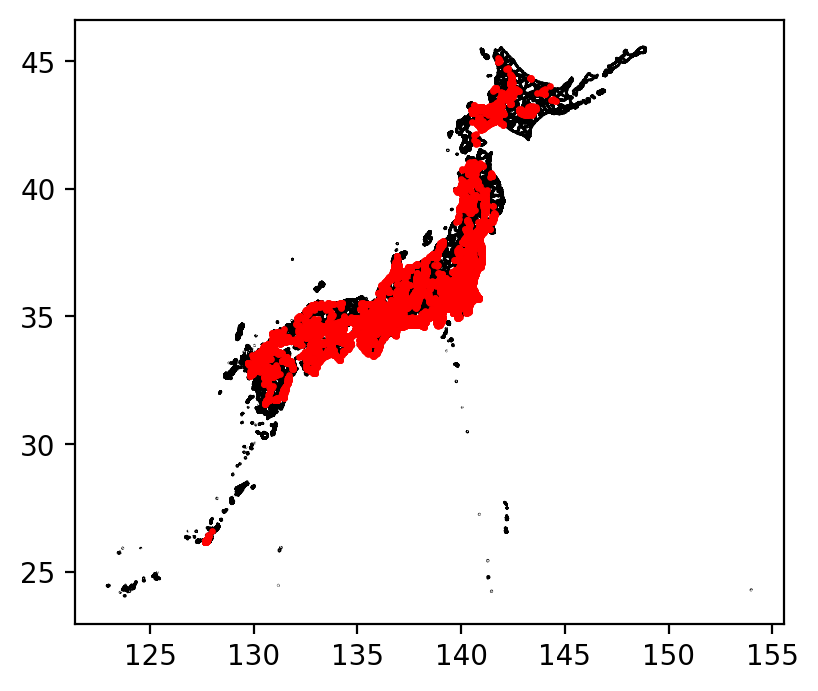

In [16]:
base = japan.plot(color="white", edgecolor="black")
spj.plot(ax=base, marker="o", color="red", markersize=2)

In [17]:
df2 = spj.pivot_table(index=["PREF", "KEN"], columns="area", values="cell", aggfunc=len, fill_value=0)
df2

,area,111,112,113,114,211,212,213,214,311,312,...,49678,49684,49690,49693,49697,49699,50500,55556,63968,64416
PREF,KEN,,,,,,,,,,,,,,,,,,,,,
01,北海道,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02,青森県,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03,岩手県,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
04,宮城県,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05,秋田県,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
06,山形県,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07,福島県,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
08,茨城県,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09,栃木県,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# 横持ちから縦持ち、sample0は除去
df3 = df2.stack().reset_index().rename(columns={0: "sample"}).query("sample > 5")
df3

,PREF,KEN,area,sample
12,01,北海道,1025,276
13,01,北海道,1026,925
14,01,北海道,1027,812
15,01,北海道,1028,414
16,01,北海道,1029,127
...,...,...,...,...
12796,45,宮崎県,47105,187
12797,45,宮崎県,47106,337
13094,46,鹿児島県,48129,41
13095,46,鹿児島県,48130,15


In [19]:
# 都道府県は昇順、sampleは降順で並び替え
df3.sort_values(["PREF", "sample"], ascending=[True, False], inplace=True)

In [20]:
# 都道府県ごとに連番
df3["id"] = df3.groupby("PREF").cumcount() + 1

In [21]:
df3

,PREF,KEN,area,sample,id
13,01,北海道,1026,925,1
14,01,北海道,1027,812,2
15,01,北海道,1028,414,3
12,01,北海道,1025,276,4
16,01,北海道,1029,127,5
...,...,...,...,...,...
12797,45,宮崎県,47106,337,1
12796,45,宮崎県,47105,187,2
13094,46,鹿児島県,48129,41,1
13095,46,鹿児島県,48130,15,2


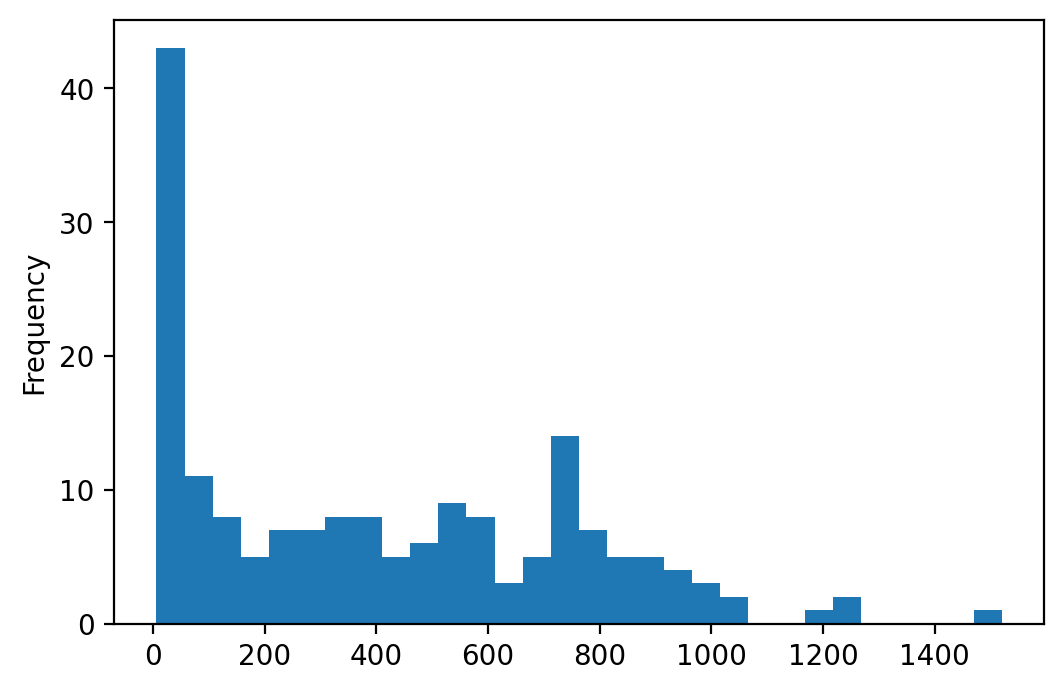

In [22]:
df3["sample"].plot.hist(bins=30)

In [23]:
from shapely.geometry import MultiPoint

In [24]:
spj.sort_values(["lat", "lon"], inplace=True)

In [25]:
spj["count"] = spj.groupby("area")["geometry"].transform("count")

In [26]:
df4 = spj.query("count > 5")

In [27]:
df5 = df4.groupby("area")["geometry"].apply(lambda x: MultiPoint(x.values).convex_hull).reset_index()

In [28]:
df5

,area,geometry
0,111,"POLYGON ((139.61458 35.45440, 139.58064 35.476..."
1,112,"POLYGON ((139.67047 35.41270, 139.63814 35.414..."
2,113,"POLYGON ((139.37590 35.59532, 139.37367 35.595..."
3,114,"POLYGON ((139.69561 35.70431, 139.57252 35.735..."
4,211,"POLYGON ((139.72573 35.59954, 139.70486 35.681..."
...,...,...
149,48008,"POLYGON ((131.25479 33.94412, 131.24338 33.952..."
150,48012,"POLYGON ((131.17127 34.00905, 131.10756 34.026..."
151,48129,"POLYGON ((130.61262 31.68897, 130.60580 31.726..."
152,48130,"POLYGON ((130.54363 31.58461, 130.54235 31.585..."


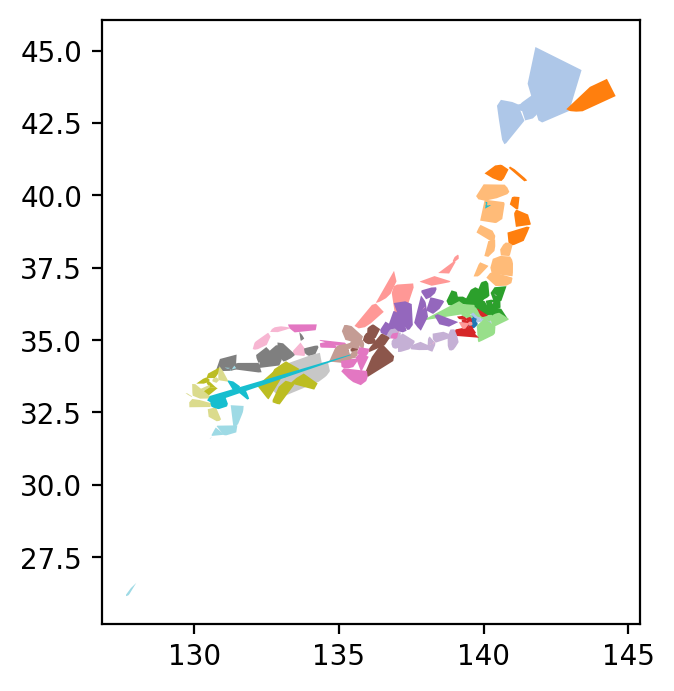

In [29]:
df5.plot(cmap="tab20")

In [30]:
import folium
from folium import plugins

In [31]:
map= folium.Map(location=[35.6759323, 139.7450316], zoom_start=10)

In [32]:
for i, r in df5.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j)
    folium.Popup(str(r["area"])).add_to(geo_j)
    geo_j.add_to(map)

In [33]:
map

In [34]:
map.save("map.html")